<a href="https://colab.research.google.com/github/legendary-idiot/ARIMA_Model/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Necessary Libraries**

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt

# **Import Data**

In [9]:
df = pd.read_csv('/content/Pollutant_Data - PM2.5.csv')

In [10]:
X = df.drop('PM2.5', axis=1)
y = df['PM2.5']

# **Train and Test Dataset**

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [13]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
y_pred = rf.predict(X_test)

# **Display Results**

In [15]:
!pip install numpy
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 26.750024541280716
Mean Squared Error: 1456.4981636239538
Root Mean Squared Error: 38.16409521558128


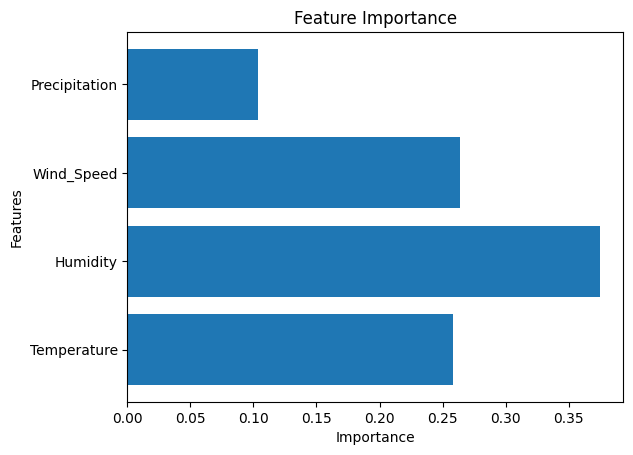

In [16]:
importances = rf.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [17]:
r2_score = rf.score(X_test, y_test)
print('R² Score:', r2_score)

R² Score: 0.2422086680871599


## **Trial 2 - Transforming Data for Better R2**

In [18]:
import numpy as np

# Apply log transformation
df['Temperature'] = np.log1p(df['Temperature'])
df['Precipitation'] = np.log1p(df['Precipitation'])
df['Wind_Speed'] = np.log1p(df['Wind_Speed'])
df['Humidity'] = np.log1p(df['Humidity'])
df['PM2.5'] = np.log1p(df['PM2.5'])


In [19]:
X = df[['Temperature', 'Precipitation', 'Wind_Speed', 'Humidity']]
y = df['PM2.5']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)


In [22]:
predictions = model.predict(X_test)


In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


Mean Absolute Error: 0.5244679734372782
Mean Squared Error: 0.4814034536059451
Root Mean Squared Error: 0.6938324391421499


In [24]:
r2_score = model.score(X_test, y_test)
print('R² Score:', r2_score)


R² Score: 0.3239005143773769


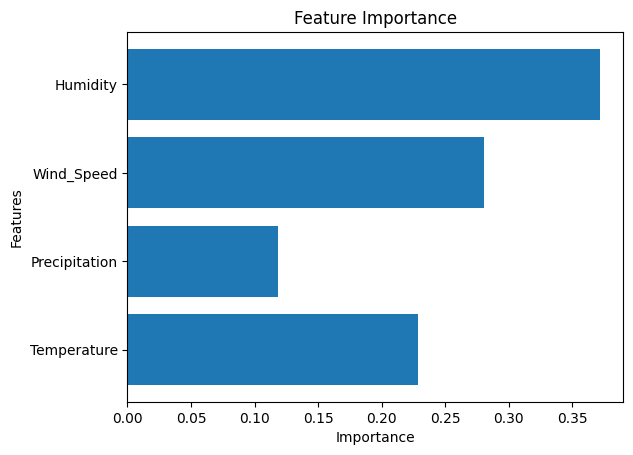

In [25]:
importances = model.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()
